In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import gzip
import csv
import pandas as pd

In [2]:
letras = "abcdefghijklmnopqrstuvwxyz"
nome = []
with open("letter.names",mode="rt", newline=None) as nomes:
    for linha in nomes:
        nome.append(linha[:(len(linha)-1)])
        
    with gzip.open("letter.data.gz", mode="rt") as jupe:
        dados = pd.read_table(jupe, sep="\t", names=nome, index_col=False)
print(dados.head())

   id letter  next_id  word_id  position  fold  p_0_0  p_0_1  p_0_2  p_0_3  \
0   1      o        2        1         1     0      0      0      0      0   
1   2      m        3        1         2     0      0      0      0      0   
2   3      m        4        1         3     0      0      0      0      0   
3   4      a        5        1         4     0      0      0      0      0   
4   5      n        6        1         5     0      0      0      0      0   

   ...  p_14_6  p_14_7  p_15_0  p_15_1  p_15_2  p_15_3  p_15_4  p_15_5  \
0  ...       0       0       0       0       0       0       0       0   
1  ...       0       0       0       0       0       0       0       0   
2  ...       0       0       0       0       0       0       0       0   
3  ...       0       0       0       0       0       0       0       0   
4  ...       0       0       0       0       0       0       0       0   

   p_15_6  p_15_7  
0       0       0  
1       0       0  
2       0       0  
3     

In [3]:
dados = dados.drop(columns=["id", "next_id","word_id","position","fold"])
dados.head()

,letter,p_0_0,p_0_1,p_0_2,p_0_3,p_0_4,p_0_5,p_0_6,p_0_7,p_1_0,...,p_14_6,p_14_7,p_15_0,p_15_1,p_15_2,p_15_3,p_15_4,p_15_5,p_15_6,p_15_7
0,o,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,m,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,m,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,n,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = pd.Categorical(dados.pop("letter")).codes

In [5]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(dados, y, test_size=0.1)
print(X_treino[:10])

       p_0_0  p_0_1  p_0_2  p_0_3  p_0_4  p_0_5  p_0_6  p_0_7  p_1_0  p_1_1  \
39337      0      0      0      0      0      0      0      0      0      0   
49115      0      0      0      0      0      0      0      0      0      0   
7647       0      1      1      0      0      0      0      0      0      0   
39176      0      0      0      0      0      0      0      0      0      0   
51514      0      0      1      1      1      1      0      0      0      0   
27117      0      0      0      0      0      0      0      0      0      0   
19814      0      0      0      0      0      0      0      0      0      0   
32939      0      0      0      0      0      1      1      0      0      0   
39195      0      0      0      0      0      0      0      0      0      0   
31588      0      0      0      0      0      0      0      0      0      0   

       ...  p_14_6  p_14_7  p_15_0  p_15_1  p_15_2  p_15_3  p_15_4  p_15_5  \
39337  ...       0       0       0       0       0  

In [6]:
X_teste = np.array(X_teste)
X_treino = np.array(X_treino)

X_teste = np.reshape(X_teste, (len(X_teste),16,8,1))
X_treino = np.reshape(X_treino, (len(X_treino),16,8,1))


In [7]:
modelo = tf.keras.Sequential([
    tf.keras.Input((16,8,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(4,2),activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(4,2),activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(4,2),activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(4,2),activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(2,2),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(2,2),activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(filters=1024, kernel_size=(2,2),activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(26, activation="softmax"),
    
], name="Modelo_final")
modelo.summary()

Model: "Modelo_final"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 7, 16)         144       
_________________________________________________________________
dropout (Dropout)            (None, 13, 7, 16)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 32)         4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 6, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 5, 64)          16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)        

In [8]:
batch = 128
epochs = 100
tf.keras.callbacks.EarlyStopping("val_accuracy",patience=100, restore_best_weights=True)
modelo.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
historia = modelo.fit(X_treino, Y_treino, batch_size=batch, epochs=epochs, validation_split=0.1)

Epoch 1/100
331/331 [==============================] - 12s 16ms/step - loss: 1.4393 - accuracy: 0.5732 - val_loss: 0.9652 - val_accuracy: 0.7094
Epoch 2/100
331/331 [==============================] - 4s 13ms/step - loss: 0.7448 - accuracy: 0.7733 - val_loss: 0.4940 - val_accuracy: 0.8517
Epoch 3/100
331/331 [==============================] - 4s 13ms/step - loss: 0.5852 - accuracy: 0.8213 - val_loss: 0.3982 - val_accuracy: 0.8775
Epoch 4/100
331/331 [==============================] - 4s 13ms/step - loss: 0.5035 - accuracy: 0.8434 - val_loss: 0.3723 - val_accuracy: 0.8818
Epoch 5/100
331/331 [==============================] - 4s 13ms/step - loss: 0.4626 - accuracy: 0.8565 - val_loss: 0.3296 - val_accuracy: 0.8952
Epoch 6/100
331/331 [==============================] - 4s 13ms/step - loss: 0.4168 - accuracy: 0.8708 - val_loss: 0.3039 - val_accuracy: 0.9009
Epoch 7/100
331/331 [==============================] - 4s 13ms/step - loss: 0.3986 - accuracy: 0.8749 - val_loss: 0.3075 - val_accuracy

331/331 [==============================] - 5s 14ms/step - loss: 0.2207 - accuracy: 0.9277 - val_loss: 0.2562 - val_accuracy: 0.9244
Epoch 58/100
331/331 [==============================] - 4s 14ms/step - loss: 0.2242 - accuracy: 0.9259 - val_loss: 0.2448 - val_accuracy: 0.9256
Epoch 59/100
331/331 [==============================] - 4s 13ms/step - loss: 0.2215 - accuracy: 0.9259 - val_loss: 0.2542 - val_accuracy: 0.9256
Epoch 60/100
331/331 [==============================] - 4s 13ms/step - loss: 0.2300 - accuracy: 0.9224 - val_loss: 0.2570 - val_accuracy: 0.9261
Epoch 61/100
331/331 [==============================] - 4s 14ms/step - loss: 0.2177 - accuracy: 0.9266 - val_loss: 0.2619 - val_accuracy: 0.9284
Epoch 62/100
331/331 [==============================] - 4s 14ms/step - loss: 0.2316 - accuracy: 0.9236 - val_loss: 0.2676 - val_accuracy: 0.9235
Epoch 63/100
331/331 [==============================] - 4s 13ms/step - loss: 0.2249 - accuracy: 0.9259 - val_loss: 0.2539 - val_accuracy: 0.929

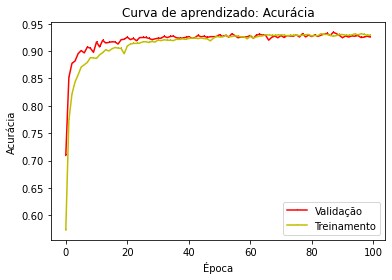

In [9]:
plt.plot(historia.epoch, historia.history['val_accuracy'], ',-r', label="Validação")
plt.plot(historia.epoch, historia.history['accuracy'],',-y', label="Treinamento")

plt.title("Curva de aprendizado: Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()

21
8
(5216,)


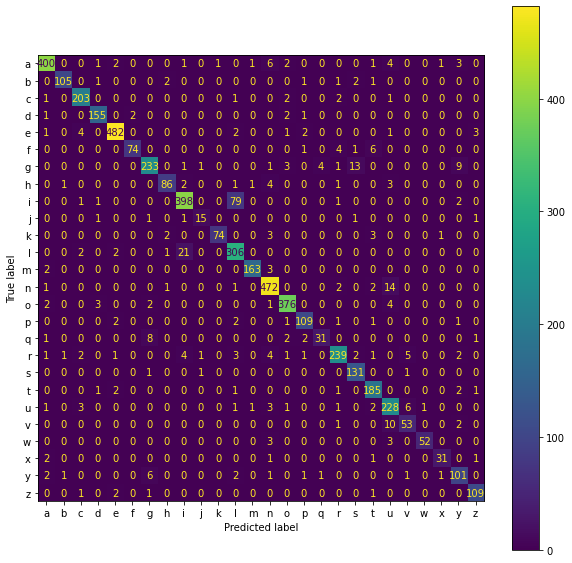

In [12]:
letras = "abcdefghijklmnopqrstuvwxyz"
def convLetra(x):
    return letras[x]
converterLetra = np.vectorize(convLetra)

Y_previsto = modelo.predict(X_teste)
Y_previsto = np.argmax(Y_previsto, axis=1)
#Y_previsto = tf.keras.utils.to_categorical(np.argmax(Y_previsto, axis=1))
print(Y_previsto[0])
print(Y_previsto[1])
print(Y_previsto.shape)
matrizConf = ConfusionMatrixDisplay.from_predictions(converterLetra(Y_teste), converterLetra(Y_previsto))
matrizConf.figure_.set_size_inches(10,10)

In [13]:
score = modelo.evaluate(X_teste, Y_teste, verbose = 2)

163/163 - 1s - loss: 0.2893 - accuracy: 0.9224


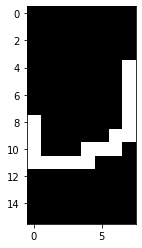

In [14]:
plt.imshow(X_treino[0],cmap="gray")

In [15]:
print(convLetra(Y_treino[0]))

u


233.9375
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
(1, 16, 8, 1)


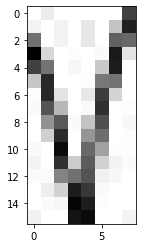

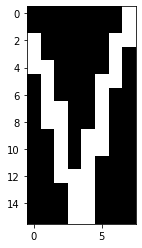

In [16]:
imgreal = tf.keras.preprocessing.image.load_img("imgteste.jpg", color_mode="grayscale")
imgreal = tf.keras.preprocessing.image.img_to_array(imgreal)
plt.imshow(imgreal,cmap="gray")
plt.figure()
media = np.mean(imgreal)
print(media)

def formatar(x):
    return np.abs(np.floor(x/media)-1)


imgreal = formatar(imgreal)
print(imgreal[0])
imgreal = np.reshape(imgreal, (1,16,8,1))
print(imgreal.shape)
plt.imshow(imgreal[0],cmap="gray")

In [17]:
print(modelo.predict(imgreal,batch_size=1))
print(convLetra(modelo.predict(imgreal,batch_size=1).argmax()))

[[1.7390116e-12 1.8199292e-12 7.7140058e-13 1.0086924e-11 8.5875890e-10
  1.0405277e-10 1.7209462e-08 8.2591389e-10 1.0249108e-08 4.3172108e-11
  2.8183709e-07 4.3803285e-09 4.3997934e-14 1.4028345e-07 5.1163991e-12
  1.6759573e-09 1.3354270e-14 5.1909786e-02 1.7110052e-13 9.2078194e-09
  1.7818293e-04 9.4791138e-01 7.9649877e-11 5.4120690e-09 2.2184095e-07
  5.4552276e-15]]
v


129.77344
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(1, 16, 8, 1)


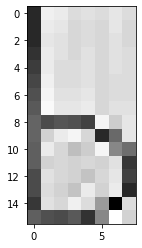

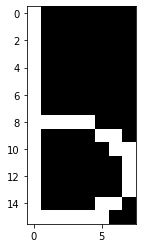

In [18]:
imgreal = tf.keras.preprocessing.image.load_img("imgteste2.jpg", color_mode="grayscale")
imgreal = tf.keras.preprocessing.image.img_to_array(imgreal)
plt.imshow(imgreal,cmap="gray")
plt.figure()
media = np.mean(imgreal)
print(media)

def formatar(x):
    return np.abs(np.floor(x/media)-1)


imgreal = formatar(imgreal)
print(imgreal[0])
imgreal = np.reshape(imgreal, (1,16,8,1))
print(imgreal.shape)
plt.imshow(imgreal[0],cmap="gray")

In [19]:
print(modelo.predict(imgreal,batch_size=1))
print(convLetra(modelo.predict(imgreal,batch_size=1).argmax()))

[[1.0676482e-11 9.9999988e-01 4.1069688e-15 2.8127740e-09 3.7151280e-13
  4.5144446e-15 6.4372919e-08 3.3959303e-08 1.2226675e-14 1.8886741e-16
  7.9149043e-09 1.4015646e-15 3.9060151e-16 4.5699274e-14 4.7746956e-10
  2.2316299e-19 2.0478046e-11 7.5918815e-17 6.3352994e-09 2.1670042e-08
  6.0990357e-14 2.2020840e-18 7.5661822e-16 1.6994264e-18 1.5653242e-08
  1.4264975e-12]]
b
